<h2>About this Project</h2>
<p>In this project, you will implement a kernelized SVM. You will generate linearly separable and non-linearly separable datasets, write kernel, loss, and gradient functions for SVMs that support a variety of different kernels, and then visualize the decision boundary created.</p>

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
<p>You can also download a copy of this notebook in multiple formats using the <strong>Download as</strong> option in the <strong>File</strong> menu above.</p>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
import numpy as np
from helper import *
import matplotlib.pyplot as plt
import sys

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


### Generate and Visualize Data

Before we start, let's generate some data and visualize the training set. We are going to use the linearly separable data that we used in our previous project!

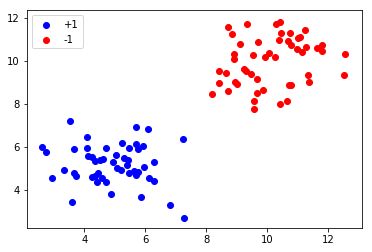

In [2]:
%matplotlib inline
xTr,yTr = generate_data()
visualize_2D(xTr, yTr)

## Kernel SVM

In this assignment, you need to implement three functions:
1. `computeK` that computes the kernel function efficiently,
2. `loss` that calculates the kernelized version of the unconstrained squared hinge loss and the regularizer, and
3. `grad` that calculates the gradients of the loss with respect to the kernel SVM's model parameters.

### Part One: Compute K [Graded]

In **`computeK`**, calculate the values of different kernel functions given inputs `X` and `Z`. You will return a matrix $\mathsf{K}$ such that the entry $\mathsf{K}_{ij} = \mathsf{K} \left( \mathbf{x}_i, \mathbf{z}_j \right)$ where $\mathsf{K} \left( \mathbf{x}_i, \mathbf{z}_j \right) = \phi \left( \mathbf{x}_i \right)^\top \phi \left(\mathbf{z}_j \right)$. As you have seen so far, computing $\phi \left(\mathbf{x}_i \right)$ and $\phi \left(\mathbf{z}_j \right)$ explicitly and taking the dot product can be computationally expensive. Consequently, we will use the dot product expression $\mathsf{K} \left( \mathbf{x}_i, \mathbf{z}_j \right)$ without ever computing $\phi \left(\mathbf{x}_i \right)$ and $ \phi \left(\mathbf{z}_j \right)$.

`computeK` takes in the parameter `kerneltype` to decide which of the three different kernel functions to calculate:
- `kerneltype == 'linear'`: $\mathsf{K} (\mathbf{X}, \mathbf{Z}) = \mathbf{X}^\top \mathbf{Z}$
- `kerneltype == 'polynomial'`: $\mathsf{K} (\mathbf{X}, \mathbf{Z}) = \left( 1 + \mathbf{X}^\top \mathbf{Z} \right)^{p}$ where `kpar = p`
- `kerneltype == 'rbf'`: $\mathsf{K} (\mathbf{X}, \mathbf{Z}) = e^{-\frac{||\mathbf{X}-\mathbf{Z}||^2}{\sigma^2}}$ where `kpar` = $\frac{1}{\sigma^2}$

**Implementation Notes:**
- When calculating the RBF kernel, you can use the `l2distance(X, Z)` function that we have provided to you. It calculates the pairwise L2 distance $||\mathbf{X} - \mathbf{Z}||$ efficiently.
- [`np.power(a, p)`](https://numpy.org/doc/stable/reference/generated/numpy.power.html) raises all entries of the vector or matrix `a` to the power `p`.

In [3]:
def computeK(kerneltype, X, Z, kpar=1):
    """
    Computes a matrix K such that K[i, j] = K(x_i, z_j). The kernel operation is defined by kerneltype with parameter kpar.

    Input:
        kerneltype: either of ['linear', 'polynomial', 'rbf']
        X: nxd data matrix
        Z: mxd data matrix
        kpar: kernel parameter (inverse sigma^2 in case of 'rbf', degree p in case of 'polynomial')

    Output:
        K : nxm kernel matrix
    """
    assert kerneltype in ['linear', 'polynomial', 'rbf'], 'Kernel type %s not known.' % kerneltype
    assert X.shape[1] == Z.shape[1], 'Input dimensions do not match'

    K = None

    # YOUR CODE HERE
    
    if kerneltype =='linear':
        K=np.dot(X,Z.T)
        
    elif kerneltype=='polynomial':
        K=np.power(1+np.dot(X,Z.T), kpar)
        
    elif kerneltype=='rbf':
        K=np.exp(-np.power(l2distance(X,Z),2)*kpar)
        
    return K
    
    # raise NotImplementedError()

### Let's re-create `computeK_test4`...

In [4]:
xTr_test, yTr_test = generate_data(100)
xTr_test2, yTr_test2 = generate_data(50)
n1, d1 = xTr_test.shape
n2, d2 = xTr_test2.shape
n1,d1, n2,d2

(100, 2, 50, 2)

In [5]:
kerneltype='rbf'
kpar=1
K=np.exp(-np.power(l2distance(xTr_test,xTr_test2),2)*kpar)
K

array([[2.86417398e-03, 1.55123287e-05, 2.45214166e-05, ...,
        1.48803011e-38, 3.60542100e-41, 3.03184970e-29],
       [9.85196962e-02, 4.59990564e-01, 6.72308624e-01, ...,
        7.64030767e-21, 3.60522719e-22, 2.33218364e-13],
       [3.84691331e-05, 2.90924868e-04, 1.15167133e-03, ...,
        1.12526423e-14, 2.58365792e-16, 1.96401871e-09],
       ...,
       [7.06725108e-23, 1.56787065e-17, 1.12286082e-16, ...,
        8.23454868e-02, 8.93803184e-02, 7.57772885e-01],
       [2.95436556e-25, 1.00026858e-19, 8.93526452e-19, ...,
        2.80048981e-01, 2.96627588e-01, 6.61842240e-01],
       [2.68507421e-16, 1.73632846e-12, 1.37628073e-11, ...,
        3.49896826e-03, 7.59770994e-04, 2.16092070e-01]])

In [6]:
k2 = computeK_grader('rbf', xTr_test, xTr_test2, kpar=1)
k2

array([[2.86417398e-03, 1.55123287e-05, 2.45214166e-05, ...,
        1.48803011e-38, 3.60542100e-41, 3.03184970e-29],
       [9.85196962e-02, 4.59990564e-01, 6.72308624e-01, ...,
        7.64030767e-21, 3.60522719e-22, 2.33218364e-13],
       [3.84691331e-05, 2.90924868e-04, 1.15167133e-03, ...,
        1.12526423e-14, 2.58365792e-16, 1.96401871e-09],
       ...,
       [7.06725108e-23, 1.56787065e-17, 1.12286082e-16, ...,
        8.23454868e-02, 8.93803184e-02, 7.57772885e-01],
       [2.95436556e-25, 1.00026858e-19, 8.93526452e-19, ...,
        2.80048981e-01, 2.96627588e-01, 6.61842240e-01],
       [2.68507421e-16, 1.73632846e-12, 1.37628073e-11, ...,
        3.49896826e-03, 7.59770994e-04, 2.16092070e-01]])

In [7]:
np.linalg.norm(K - k2) < 1e-5

True

In [8]:
# These tests test whether your computeK() is implemented correctly

xTr_test, yTr_test = generate_data(100)
xTr_test2, yTr_test2 = generate_data(50)
n, d = xTr_test.shape

# Checks whether computeK compute the kernel matrix with the right dimension
def computeK_test1():
    s1 = (computeK('rbf', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    s2 = (computeK('polynomial', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    s3 = (computeK('linear', xTr_test, xTr_test2, kpar=1).shape == (100, 50))
    return (s1 and s2 and s3)

# Checks whether the kernel matrix is symmetric
def computeK_test2():
    k_rbf = computeK('rbf', xTr_test, xTr_test, kpar=1)
    s1 = np.allclose(k_rbf, k_rbf.T)
    k_poly = computeK('polynomial', xTr_test, xTr_test, kpar=1)
    s2 = np.allclose(k_poly, k_poly.T)
    k_linear = computeK('linear', xTr_test, xTr_test, kpar=1)
    s3 = np.allclose(k_linear, k_linear.T)
    return (s1 and s2 and s3)

# Checks whether the kernel matrix is positive semi-definite
def computeK_test3():
    k_rbf = computeK('rbf', xTr_test2, xTr_test2, kpar=1)
    eigen_rbf = np.linalg.eigvals(k_rbf)
    eigen_rbf[np.isclose(eigen_rbf, 0)] = 0
    s1 = np.all(eigen_rbf >= 0)
    k_poly = computeK('polynomial', xTr_test2, xTr_test2, kpar=1)
    eigen_poly = np.linalg.eigvals(k_poly)
    eigen_poly[np.isclose(eigen_poly, 0)] = 0
    s2 = np.all(eigen_poly >= 0)
    k_linear = computeK('linear', xTr_test2, xTr_test2, kpar=1)
    eigen_linear = np.linalg.eigvals(k_linear)
    eigen_linear[np.isclose(eigen_linear, 0)] = 0
    s3 = np.all(eigen_linear >= 0)
    return (s1 and s2 and s3)

# Checks whether computeK compute the right kernel matrix with rbf kernel
def computeK_test4():
    k = computeK('rbf', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('rbf', xTr_test, xTr_test2, kpar=1)
    
    return np.linalg.norm(k - k2) < 1e-5

# Checks whether computeK compute the right kernel matrix with polynomial kernel
def computeK_test5():
    k = computeK('polynomial', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('polynomial', xTr_test, xTr_test2, kpar=1)
    
    return np.linalg.norm(k - k2) < 1e-5

# Checks whether computeK compute the right kernel matrix with linear kernel
def computeK_test6():
    k = computeK('linear', xTr_test, xTr_test2, kpar=1)
    k2 = computeK_grader('linear', xTr_test, xTr_test2, kpar=1)
    
    return np.linalg.norm(k - k2) < 1e-5


runtest(computeK_test1, 'computeK_test1')
runtest(computeK_test2, 'computeK_test2')
runtest(computeK_test3, 'computeK_test3')
runtest(computeK_test4, 'computeK_test4')
runtest(computeK_test5, 'computeK_test5')
runtest(computeK_test6, 'computeK_test6')

Running Test: computeK_test1 ... ✔ Passed!
Running Test: computeK_test2 ... ✔ Passed!
Running Test: computeK_test3 ... ✔ Passed!
Running Test: computeK_test4 ... ✔ Passed!
Running Test: computeK_test5 ... ✔ Passed!
Running Test: computeK_test6 ... ✔ Passed!


In [9]:
# Autograder test cell - worth 1 point
# runs computeK_test1

In [10]:
# Autograder test cell - worth 1 point
# runs computeK_test2

In [11]:
# Autograder test cell - worth 1 point
# runs computeK_test3

In [12]:
# Autograder test cell - worth 1 point
# runs computeK_test4

In [13]:
# Autograder test cell - worth 1 point
# runs computeK_test5

In [14]:
# Autograder test cell - worth 1 point
# runs computeK_test5

Previously in linear SVM, we could pass in $\mathbf{w}$ to calculate the unconstrained square hinge loss and the $l_2$-regularizer. However, for the kernelized version of the loss function, $\mathbf{w}$ is written as a linear combination of the $n$ training examples $\phi \left( \mathbf{x}_1 \right), \dots, \phi \left( \mathbf{x}_n \right)$ and thus we will need to pass in the coefficients in the linear combination and training points.

As we will see in the following section, after substituting $\mathbf{w}$ with a linear combination of training examples, we can simplify the kernel SVM loss function quite a bit.

### Kernelized SVM Loss Function

We assume a training set of $n$ examples. Recall how $\mathbf{w}$ could be written as a linear combination of the training samples:
$$
    \mathbf{w} = \sum_{j = 1}^n \alpha_j y_j \phi \left( \mathbf{x}_j \right) = \sum_{j=1}^n \beta_j \phi \left( \mathbf{x}_j \right)
$$
where we define new model parameters $\beta_j = \alpha_j y_j$ for simpler expressions going forward.

Also recall the expression for the regularizer and the unconstrained squared hinge loss over any $m$ points $\phi\left( \mathbf{z}_1 \right), \dots, \phi \left( \mathbf{z}_m \right)$. If we substitute $\mathbf{w}$ into the loss, we get the following expression. **Observe that only the squared hinge loss is dependent on the $m$ points; the regularizer is independent.**
$$
    \begin{aligned}
    \ell(\mathbf{w}, b) &= \underbrace{\mathbf{w}^\top \mathbf{w}}_{l_{2} \text{ regularizer} } +  C \underbrace{ \sum_{i=1}^{m} \max \left[ 1-y_{i} \left( \mathbf{w}^\top \phi \left(\mathbf{z}_i\right) + b \right), 0 \right]^2}_{ \text{squared hinge loss} }\\
        &= \left( \sum_{j=1}^n \beta_j \phi \left( \mathbf{x}_j \right) \right)^\top \left( \sum_{j=1}^n \beta_j \phi \left( \mathbf{x}_j \right) \right)
            + C \sum_{i=1}^m \max \left[ 1 - y_i \left( \left( \sum_{j=1}^n \beta_j \phi \left( \mathbf{x}_j \right) \right)^\top \phi \left( \mathbf{z}_i \right) + b \right), 0 \right]^2\\
        &= \sum_{j = 1}^n \sum_{k = 1}^n \beta_j \beta_k \phi \left( \mathbf{x}_j \right)^\top \phi \left( \mathbf{x}_k \right)
            + C \sum_{i=1}^{m} \max \left[ 1-y_{i} \left( \sum_{j = 1}^n \beta_j \phi \left(\mathbf{x}_j \right)^\top \phi \left(\mathbf{z}_i \right)+b \right), 0 \right]^2
    \end{aligned}
$$

Let us now replace all the dot product terms $\phi(\mathbf{a})^\top \phi(\mathbf{b})$ with $\mathsf{K}(\mathbf{a}, \mathbf{b})$ for all data points $\mathbf{a}, \mathbf{b}$.
$$
    \begin{aligned}
    \ell\left( \beta_1, \dots, \beta_n, b \right) = \underbrace{\sum_{j = 1}^n \sum_{k = 1}^n \beta_j \beta_k \mathsf{K} \left( \mathbf{x}_j, \mathbf{x}_k \right)}_{l_{2} \text{ regularizer}}
        + C \underbrace{ \sum_{i=1}^{m} \max \left[ 1-y_{i} \left(\sum_{j = 1}^n \beta_j \mathsf{K} \left(\mathbf{x}_j, \mathbf{z}_i \right)+b \right), 0 \right]^2}_{\text{squared hinge loss}}
    \end{aligned}
$$

Let us pause here to observe a few facts:
- When $\mathbf{w}$ is written as a linear combination of the $n$ training points, the loss is then optimized over the parameters $\beta_1, \dots, \beta_n, b$.
- The $l_2$-regularizer is a dot-product of $\mathbf{w}$ with itself. Since $\mathbf{w}$ is a linear combination of the $n$ training points, the regularizer only depends on the dot-products between $n$ training points.
- The loss never needs $\phi(\mathbf{x})$ explicitly. It only needs the dot products between data points.

Now, let us move ahead and simplify the loss function to a vector form. First, we will simplify the $l_{2}$ regularizer. Define $\mathbf{\beta} = \left[\beta_1, \dots, \beta_n \right]^\top$ and $\mathsf{K}_{nn}$ of size $n \times n$ to be the kernel matrix calculated on the training set of $n$ points. Precisely, the entry $\mathsf{K}_{nn}[j, k] = \mathsf{K} \left(\mathbf{x}_j, \mathbf{x}_k \right)$. Thus, the $l_2$-regularizer can be written as the quadratic form:
$$
    \sum_{j = 1}^n \sum_{k = 1}^n \beta_j \beta_k \mathsf{K} \left(\mathbf{x}_j, \mathbf{x}_k \right) = \mathbf{\beta}^\top \mathsf{K}_{nn} \mathbf{\beta}
$$

Similarly, we can define the kernel matrix $\mathsf{K}_{nm}$ of size $n \times m$, the $(j, i)^{th}$ entry is $\mathsf{K}_{nm}[j, i] = \mathsf{K} \left( \mathbf{x}_j, \mathbf{z}_i \right)$. Hence, the summation term in the hinge loss can be expressed as: 
$$
    \sum_{j = 1}^n \beta_j \mathsf{K} \left(\mathbf{x}_j, \mathbf{z}_i \right) = \mathbf{\beta}^\top \mathsf{K}_{nm}[:, i]
$$
where $\mathsf{K}_{nm}[:, i]$ is the $i^{th}$ column of $\mathsf{K}_{nm}$.

Combining the two simplifications we have, we arrive at the following final expression for the loss function: 
$$
    \begin{aligned}
    \ell\left( \mathbf{\beta}, b \right) = \underbrace{\mathbf{\beta}^\top \mathsf{K}_{nn} \mathbf{\beta}}_{l_{2} \text{ regularizer}}
        + C \underbrace{ \sum_{i=1}^{m} \max \left[ 1-y_{i} \left( \mathbf{\beta}^\top \mathsf{K}_{nm}[:, i] + b \right), 0 \right]^2}_{\text{squared hinge loss}}
    \end{aligned}
$$

**During training, we minimize the training loss, with $\mathsf{K}_{nm}$ replaced by $\mathsf{K}_{nn}$, to get the optimal $\mathbf{\beta}, b$. Then we fix $\mathbf{\beta}, b$ and evaluate the loss value on testing points with $\mathsf{K}_{nm}$ in the squared hinge loss.**

Note that the loss function we have above is very similar to the vanilla linear SVM. The key differences are: 
1. Instead of $\mathbf{w}$, we have $\mathbf{\beta}$ to optimize for.
2. The $l_{2}$-regularizer $\mathbf{w}^\top \mathbf{w}$ is replaced by $\mathbf{\beta}^\top \mathsf{K}_{nn} \mathbf{\beta}$ to account for using $\mathbf{\beta}$ instead of $\mathbf{w}$.
3. The inner product $\mathbf{w}^\top \phi \left( \mathbf{z}_i \right)$ in the hinge loss is changed to $\mathbf{\beta}^T \mathsf{K}_{nm}[:, i]$.

Since each entry of $\mathsf{K}_{nn}$ and $\mathsf{K}_{nm}$ can be calculated by a simple formula in `computeK`, the kernel SVM is efficiently optimizable even if the $\phi$ function is in a high-dimensional space.

### Part Two: Compute Loss [Graded]

Now you will implement the function **`loss`**. The function takes in model parameters `beta, b`, $n$ training points as `xTr, yTr` and $m$ testing points as `xTe, yTe`, along with hyperparameters `C, kerneltype, kpar`. You will need to calculate both kernel matrices $\mathsf{K}_{nn}$ and $\mathsf{K}_{nm}$ using `computeK` on `xTr, xTr` and `xTr, xTe` respectively.

When we use the `loss` function later on, we are going to be a little clever: we will use it both for testing and training loss.
- During training, we will call `loss(beta, b, xTr, yTr, xTr, yTr, C, kerneltype, kpar)` so that the hinge loss gets calculated on $\mathsf{K}_{nn}$.
- During testing, we will just call `loss(beta, b, xTr, yTr, xTe, yTe, C, kerneltype, kpar)` so that the hinge loss gets calculated on $\mathsf{K}_{nm}$.

Therefore, you should implement `loss` keeping in mind how we will call it during training and testing.

In [15]:
def loss(beta, b, xTr, yTr, xTe, yTe, C, kerneltype, kpar=1):
    """
    Calculates the loss (regularizer + squared hinge loss) for testing data against training data and parameters beta, b.
    
    Input:
        beta  : n-dimensional vector that stores the linear combination coefficients
        b     : bias term, a scalar
        xTr   : nxd dimensional data matrix (training set, each row is an input vector)
        yTr   : n-dimensional vector (training labels, each entry is a label)
        xTe   : mxd dimensional matrix (test set, each row is an input vector)
        yTe   : m-dimensional vector (test labels, each entry is a label)
        C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)
        kerneltype: either of ['linear', 'polynomial', 'rbf']
        kpar  : kernel parameter (inverse sigma^2 in case of 'rbf', degree p in case of 'polynomial')
    
    Output:
        loss_val : the total loss obtained with (beta, xTr, yTr, b) on xTe and yTe, a scalar
    """
    
    loss_val = 0.0
    # compute the kernel values between xTr and xTr 
    kernel_train = computeK(kerneltype, xTr, xTr, kpar)   # Knn
    # compute the kernel values between xTr and xTe
    kernel_test = computeK(kerneltype, xTr, xTe, kpar)    # Knm
    
    # YOUR CODE HERE
    from numpy.linalg import multi_dot
    
    l2_reg=multi_dot([beta,kernel_train,beta])
    pred=np.dot(beta,kernel_test)+b
    margin=yTe*pred
    sq_hinge=C*np.sum(np.maximum(1-margin,0)**2)
    
    loss_val=l2_reg+sq_hinge
         
    return loss_val

    # raise NotImplementedError()

### Let's re-create `loss_test6`

In [16]:
xTr_test, yTr_test = generate_data()
n,d = xTr_test.shape
xTr_test,yTr_test,n,d

(array([[ 4.3306768 ,  4.82472089],
        [ 3.71163556,  4.4577317 ],
        [ 4.16330569,  6.56802007],
        [ 3.66010845,  4.53846822],
        [ 4.55549943,  3.96010063],
        [ 6.31195626,  5.23920582],
        [ 7.06513651,  4.6731698 ],
        [ 4.70146907,  5.8590672 ],
        [ 5.57814129,  4.13935623],
        [ 5.15350325,  4.9008083 ],
        [ 3.51395599,  6.62930122],
        [ 6.51176755,  4.74758129],
        [ 5.37945229,  5.42018558],
        [ 5.16052601,  5.21129678],
        [ 4.31696689,  4.78599444],
        [ 3.8330004 ,  4.58676835],
        [ 6.02312154,  5.64667521],
        [ 5.48960276,  4.60020269],
        [ 6.14592317,  6.22030151],
        [ 4.54748731,  6.91200684],
        [ 5.06961272,  4.94173571],
        [ 2.93255294,  5.14551727],
        [ 5.42119073,  6.71848484],
        [ 4.91395576,  4.06611938],
        [ 4.64730181,  4.70442892],
        [ 4.00261079,  5.1571099 ],
        [ 4.87458897,  3.72098783],
        [ 3.35168629,  6.773

In [17]:
beta = np.zeros(n)
b = np.random.rand(1)
beta,b

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.14569667]))

In [18]:
loss_val = 0.0
C=10
kernel_type='rbf'
kpar=1
    # compute the kernel values between xTr and xTr 
kernel_train = computeK(kerneltype, xTr_test, xTr_test, kpar)   # Knn
    # compute the kernel values between xTr and xTe
kernel_test = computeK(kerneltype, xTr_test, xTr_test, kpar)    # Knm
kernel_train,kernel_test

(array([[1.00000000e+00, 5.95774449e-01, 4.65557333e-02, ...,
         4.83314511e-25, 1.63375809e-21, 9.66025152e-18],
        [5.95774449e-01, 1.00000000e+00, 9.49183891e-03, ...,
         8.14647926e-30, 6.18377142e-26, 1.78093955e-21],
        [4.65557333e-02, 9.49183891e-03, 1.00000000e+00, ...,
         2.89941778e-19, 3.32476112e-16, 1.24641575e-11],
        ...,
        [4.83314511e-25, 8.14647926e-30, 2.89941778e-19, ...,
         1.00000000e+00, 7.24838836e-01, 2.21758532e-02],
        [1.63375809e-21, 6.18377142e-26, 3.32476112e-16, ...,
         7.24838836e-01, 1.00000000e+00, 8.89718584e-02],
        [9.66025152e-18, 1.78093955e-21, 1.24641575e-11, ...,
         2.21758532e-02, 8.89718584e-02, 1.00000000e+00]]),
 array([[1.00000000e+00, 5.95774449e-01, 4.65557333e-02, ...,
         4.83314511e-25, 1.63375809e-21, 9.66025152e-18],
        [5.95774449e-01, 1.00000000e+00, 9.49183891e-03, ...,
         8.14647926e-30, 6.18377142e-26, 1.78093955e-21],
        [4.65557333e-02, 

In [19]:
from numpy.linalg import multi_dot
    
l2_reg=multi_dot([beta,kernel_train,beta])
pred=np.dot(beta,kernel_test)+b
margin=yTr_test*pred
sq_hinge=C*np.sum(np.maximum(1-margin,0)**2)
    
loss_val=l2_reg+sq_hinge
loss_val

1021.2275181963869

In [20]:
loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
loss_val_grader

1021.2275181963869

In [21]:
np.linalg.norm(loss_val - loss_val_grader) < 1e-5

True

In [22]:
# These tests test whether your loss() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape

# Check whether your loss() returns a scalar
def loss_test1():
    beta = np.zeros(n)
    b = np.zeros(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
    return np.isscalar(loss_val)


# Check whether your loss() returns a nonnegative scalar
def loss_test2():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
    return loss_val >= 0

# Check whether you implement l2-regularizer correctly
def loss_test3():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 0, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 0, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement square hinge loss correctly
def loss_test4():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement square hinge loss correctly
def loss_test5():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 10, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement loss correctly
def loss_test6():
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 100, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTr_test, yTr_test, 100, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

# Check whether you implement loss correctly for testing data
def loss_test7():
    xTe_test, yTe_test = generate_data()
    m, _ = xTe_test.shape
    
    beta = np.zeros(n)
    b = np.random.rand(1)
    loss_val = loss(beta, b, xTr_test, yTr_test, xTe_test, yTe_test, 100, 'rbf')
    loss_val_grader = loss_grader(beta, b, xTr_test, yTr_test, xTe_test, yTe_test, 100, 'rbf')
    
    return (np.linalg.norm(loss_val - loss_val_grader) < 1e-5)

runtest(loss_test1,'loss_test1')
runtest(loss_test2,'loss_test2')
runtest(loss_test3,'loss_test3')
runtest(loss_test4,'loss_test4')
runtest(loss_test5,'loss_test5')
runtest(loss_test6,'loss_test6')
runtest(loss_test7,'loss_test7')

Running Test: loss_test1 ... ✔ Passed!
Running Test: loss_test2 ... ✔ Passed!
Running Test: loss_test3 ... ✔ Passed!
Running Test: loss_test4 ... ✔ Passed!
Running Test: loss_test5 ... ✔ Passed!
Running Test: loss_test6 ... ✔ Passed!
Running Test: loss_test7 ... ✔ Passed!


In [23]:
# Autograder test cell - worth 1 point
# runs loss_test1

In [24]:
# Autograder test cell - worth 1 point
# runs loss test2

In [25]:
# Autograder test cell - worth 1 point
# runs loss test3

In [26]:
# Autograder test cell - worth 1 point
# runs loss test4

In [27]:
# Autograder test cell - worth 1 point
# runs loss test5

In [28]:
# Autograder test cell - worth 1 point
# runs loss test6

In [ ]:
# Autograder test cell - worth 1 point
xTe_test, yTe_test = generate_data()
m, _ = xTe_test.shape

assert loss_test7()
# runs loss test7

### Part Three: Compute Gradient [Graded]

Now, you will implement the function **`grad`** that computes the gradients of the loss function with respect to the parameters, similar to what you did in the Linear SVM project. `grad` outputs the gradient with respect to $\mathbf{\beta}$ (`beta_grad`) and $b$ (`bgrad`). Unlike `loss`, `grad` is only called during the training phase; consequently, the input parameters don't include `xTe, yTe`. Remember that the squared hinge loss is calculated with $\mathsf{K}_{nn}$ when training, and so you would just need to call `computeK` on `xTr, xTr` here.

The gradients are given by:
$$
    \begin{aligned}
    \frac{\partial \ell}{\partial \mathbf{\beta}} &=  2 \mathsf{K}_{nn} \mathbf{\beta} + C \sum_{i=1}^{n} 2 \max \left[ 1-y_{i} \left(\mathbf{\beta}^\top \mathsf{K}_{nn}[:, i] + b \right), 0 \right] \left( - y_i \mathsf{K}_{nn}[:, i] \right) \mathbf{1}_{1 - y_i \left( \mathbf{\beta}^\top \mathsf{K}_{nn}[:, i] + b \right) > 0}\\
    \frac{\partial \ell}{\partial b} &=  C \sum_{i=1}^{n} 2 \max \left[ 1-y_{i} \left( \mathbf{\beta}^\top \mathsf{K}_{nn}[:, i] + b \right), 0 \right] \left(-y_i \right) \mathbf{1}_{1 - y_i \left( \mathbf{\beta}^\top \mathsf{K}_{nn}[:, i] + b \right) > 0}
    \end{aligned}
$$
where the indicator function is:
$$
\mathbf{1}_{1 - y_i \left( \mathbf{\beta}^\top \mathsf{K}_{nn}[:, i] + b \right) > 0} = \left\{ \begin{array}{ll}1 & \text{if }1 - y_i \left( \mathbf{\beta}^\top \mathsf{K}_{nn}[:, i] + b \right) > 0 \\ 0 & \text{otherwise} \end{array} \right.
$$

In [29]:
def grad(beta, b, xTr, yTr, C, kerneltype, kpar=1):
    """
    Calculates the gradients of the loss function with respect to beta and b.
    
    Input:
        beta  : n-dimensional vector that stores the linear combination coefficients
        b     : bias term, a scalar
        xTr   : nxd dimensional data matrix (training set, each row is an input vector)
        yTr   : n-dimensional vector (training labels, each entry is a label)
        C     : scalar (constant that controls the tradeoff between l2-regularizer and hinge-loss)
        kerneltype: either of ['linear', 'polynomial', 'rbf']
        kpar  : kernel parameter (inverse sigma^2 in case of 'rbf', degree p in case of 'polynomial')
    
    Output:
        beta_grad, bgrad
        beta_grad :  n-dimensional vector (the gradient of loss with respect to the beta)
        bgrad     :  scalar (the gradient of loss with respect to the bias, b)
    """
    
    n,d = xTr.shape
    
    beta_grad = np.zeros(n)
    bgrad = np.zeros(1)
    
    # compute the kernel values between xTr and xTr 
    kernel_train = computeK(kerneltype, xTr, xTr, kpar)
    
    # YOUR CODE HERE    

    pred=beta@kernel_train+b
    margin = yTr*pred
    hinge = np.maximum(1-margin,0)
    indicator = ((1 - margin) > 0).astype(int)

    beta_grad_first_term=2*np.dot(kernel_train,beta)
    beta_grad_second_term=C*np.sum((2*hinge*indicator*(-yTr)).reshape(-1, 1)*kernel_train, axis=0) 
    
    beta_grad=beta_grad_first_term+beta_grad_second_term
    bgrad = C*np.sum(2*hinge*indicator*(-yTr), axis=0)
                                    
    return beta_grad,bgrad

    # raise NotImplementedError()

### Let's re-create `grad_test4`

In [30]:
xTr_test, yTr_test = generate_data()
n,d = xTr_test.shape
xTr_test, yTr_test,n,d

(array([[ 4.75993395,  4.90983691],
        [ 6.41451936,  4.90174602],
        [ 5.25859351,  5.6121672 ],
        [ 5.36436687,  4.98225137],
        [ 3.63650194,  4.81464955],
        [ 2.97950303,  5.02994666],
        [ 5.582329  ,  5.94925161],
        [ 6.14857051,  5.13715922],
        [ 5.01137796,  4.52884731],
        [ 5.15110931,  3.95825462],
        [ 4.68607014,  4.9200894 ],
        [ 6.34913714,  4.11042558],
        [ 6.5836974 ,  5.93063258],
        [ 4.5866798 ,  4.52330621],
        [ 5.40049713,  6.78845758],
        [ 5.82285857,  5.91793986],
        [ 5.70269849,  5.58896395],
        [ 7.26050721,  5.6093482 ],
        [ 3.99538716,  5.21533109],
        [ 2.94750164,  3.47575137],
        [ 5.67053899,  5.47045471],
        [ 4.75335934,  2.16447337],
        [ 6.26667541,  3.59606425],
        [ 5.27532646,  5.42305389],
        [ 3.44388228,  5.67945738],
        [ 6.79368585,  2.61023424],
        [ 5.01566274,  5.80234392],
        [ 5.93385809,  6.646

In [31]:
beta = np.zeros(n)
b = np.random.rand(1)
C=1
beta_grad = np.zeros(n)
bgrad = np.zeros(1)
beta_grad,bgrad

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.]))

In [32]:
kernel_train=computeK('rbf', xTr, xTr, kpar=1)
kernel_train

array([[1.00000000e+00, 5.67311503e-04, 1.02276040e-02, ...,
        9.73431390e-21, 3.81660181e-13, 1.57232451e-21],
       [5.67311503e-04, 1.00000000e+00, 1.67059311e-01, ...,
        1.58356771e-38, 1.85290260e-28, 5.18791869e-35],
       [1.02276040e-02, 1.67059311e-01, 1.00000000e+00, ...,
        2.48390417e-35, 6.56078391e-25, 2.19641494e-35],
       ...,
       [9.73431390e-21, 1.58356771e-38, 2.48390417e-35, ...,
        1.00000000e+00, 6.82714903e-02, 7.68787286e-05],
       [3.81660181e-13, 1.85290260e-28, 6.56078391e-25, ...,
        6.82714903e-02, 1.00000000e+00, 4.27953081e-07],
       [1.57232451e-21, 5.18791869e-35, 2.19641494e-35, ...,
        7.68787286e-05, 4.27953081e-07, 1.00000000e+00]])

In [33]:
pred=beta@kernel_train+b
pred

array([0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235753,
       0.93235753, 0.93235753, 0.93235753, 0.93235753, 0.93235

In [34]:
margin=yTr*pred
margin

array([ 0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
        0.93235753,  0.93235753,  0.93235753,  0.93235753,  0.93235753,
       -0.93235753, -0.93235753, -0.93235753, -0.93235753, -0.93235753,
       -0.93235753, -0.93235753, -0.93235753, -0.93235753, -0.93235753,
       -0.93235753, -0.93235753, -0.93235753, -0.93235753, -0.93235753,
       -0.93235753, -0.93235753, -0.93235753, -0.93235753, -0.93

In [35]:
hinge = np.maximum(1-margin,0)
hinge

array([0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       0.06764247, 0.06764247, 0.06764247, 0.06764247, 0.06764247,
       1.93235753, 1.93235753, 1.93235753, 1.93235753, 1.93235753,
       1.93235753, 1.93235753, 1.93235753, 1.93235753, 1.93235753,
       1.93235753, 1.93235753, 1.93235753, 1.93235753, 1.93235753,
       1.93235753, 1.93235753, 1.93235753, 1.93235753, 1.93235753,
       1.93235753, 1.93235753, 1.93235753, 1.93235753, 1.93235

In [36]:
indicator = ((1 - margin) > 0).astype(int)
indicator

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
beta_grad_first_term=2*np.dot(kernel_train,beta)
beta_grad_second_term=C*np.sum((2*hinge*indicator*(-yTr)).reshape(-1, 1)*kernel_train, axis=0) 
beta_grad=beta_grad_first_term,beta_grad_second_term
beta_grad_first_term,beta_grad_second_term,beta_grad

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.81485557, -0.54372189, -1.38153677, -0.29160647, -1.77952254,
        -0.59620208, -1.9942753 , -2.12747628, -1.91977482, -2.29996166,
        -0.22604036, -1.5814867 , -2.18429845, -1.82074616, -2.46303683,
        -1.33054339, -0.66681373, -1.38910991, -1.86296522, -1.68280069,
        -1.93556923, -1.80187509, -2.09939504, -1.8909792 , -1.16125271,
        -0.94821822, -2.31575396, -1.30772615, -0.36594568, -2.28570166,
        -2.49661639, -0.44585028, -0.23403776, -2.39166481, -2.34444341,
        -1.50277221, -1.03701775, -0.91

In [38]:
bgrad = C*np.sum(2*hinge*indicator*(-yTr), axis=0)
bgrad

186.47150650595364

In [39]:
beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, 1, 'rbf')
beta_grad_grader,bgrad_grader

(array([-2.41692111, -1.12702026, -2.17591937, -2.21665301, -1.29932158,
        -0.63723217, -1.7010737 , -1.50112105, -2.01490838, -1.23763855,
        -2.40429863, -0.78200675, -1.01215892, -2.00277421, -0.65377575,
        -1.61200398, -1.95173976, -0.59770538, -1.79382066, -0.34346694,
        -2.02624278, -0.24146757, -0.61575975, -2.30966938, -0.92775644,
        -0.23106987, -1.94100375, -0.75032184, -1.78606271, -2.4442112 ,
        -2.2988929 , -0.64651763, -1.69921621, -2.42763982, -1.52301109,
        -1.21824492, -0.39876828, -2.23273098, -2.18310811, -1.66907248,
        -1.75646101, -0.65761965, -0.6058595 , -1.92233722, -2.40931425,
        -1.73640872, -2.42162833, -0.60219015, -0.8050719 , -0.47062762,
        40.48611275, 61.09905028, 61.70406386, 53.92579266, 52.2540536 ,
        51.65381329, 22.97751814, 56.62736969, 43.91420403, 14.0504155 ,
        25.70093786, 58.69888509, 40.99007871, 61.18621509, 42.09762094,
        30.93986747, 40.81762984, 59.03982352,  5.5

In [40]:
(np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

False

In [41]:
# These tests test whether your grad() is implemented correctly

xTr_test, yTr_test = generate_data()
n, d = xTr_test.shape
    
# Checks whether grad returns a tuple
def grad_test1():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    out = grad(beta, b, xTr_test, yTr_test, 10, 'rbf')
    return len(out) == 2

# Checks the dimension of gradients
def grad_test2():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, 10, 'rbf')
    return len(beta_grad) == n and np.isscalar(bgrad)

# Checks the gradient of the l2 regularizer
def grad_test3():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, 0, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, 0, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the square hinge loss
def grad_test4():
    beta = np.zeros(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, 1, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, 1, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

# Checks the gradient of the loss
def grad_test5():
    beta = np.random.rand(n)
    b = np.random.rand(1)
    beta_grad, bgrad = grad(beta, b, xTr_test, yTr_test, 10, 'rbf')
    beta_grad_grader, bgrad_grader = grad_grader(beta, b, xTr_test, yTr_test, 10, 'rbf')
    return (np.linalg.norm(beta_grad - beta_grad_grader) < 1e-5) and \
        (np.linalg.norm(bgrad - bgrad_grader) < 1e-5)

runtest(grad_test1, 'grad_test1')
runtest(grad_test2, 'grad_test2')
runtest(grad_test3, 'grad_test3')
runtest(grad_test4, 'grad_test4')
runtest(grad_test5, 'grad_test5')

Running Test: grad_test1 ... ✔ Passed!
Running Test: grad_test2 ... ✔ Passed!
Running Test: grad_test3 ... ✔ Passed!
Running Test: grad_test4 ... ✔ Passed!
Running Test: grad_test5 ... ✔ Passed!


In [42]:
# Autograder test cell - worth 1 point
# runs grad test1

In [43]:
# Autograder test cell - worth 1 point
# runs grad test2

In [44]:
# Autograder test cell - worth 1 point
# runs grad test3

In [45]:
# Autograder test cell - worth 1 point
# runs grad test4

In [46]:
# Autograder test cell - worth 1 point
# runs grad test5

## Test the Kernelized Algorithm

Using the cell below, you can call the optimization routine that we have implemented for you to see the final loss of your model. The loss will not be 0 since it includes the non-zero regularization term. To check only squared hinge loss term, we can subtract the regularization term from the final loss.

In [47]:
beta_sol, bias_sol, final_loss = minimize(objective=loss, grad=grad, xTr=xTr, yTr=yTr, C=1000, kerneltype='linear', kpar=1)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss))

K_nn = computeK('linear', xTr, xTr, kpar=1)
reg = beta_sol @ K_nn @ beta_sol
print('The Final Squared Hinge Loss of your model is: {:0.4f}'.format(final_loss - reg))

The Final Loss of your model is: 0.7576
The Final Squared Hinge Loss of your model is: 0.0003


If everything is implemented correctly, you should be able to get a training error of zero when you run the following cell.

In [48]:
svmclassify = lambda x: np.sign(computeK('linear', x, xTr, 1).dot(beta_sol) + bias_sol)

predsTr=svmclassify(xTr)
trainingerr=np.mean(np.sign(predsTr)!=yTr)
print("Training error: %2.4f" % trainingerr)

Training error: 0.0000


<h3>Visualize the Decision Boundary</h3>

Also, when you visualize the classifier, you should see a max margin separator.

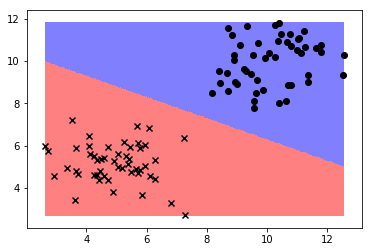

In [49]:
%matplotlib inline
visclassifier(svmclassify, xTr, yTr)

Let's visualize a different kind of nonlinear data, a spiral dataset.

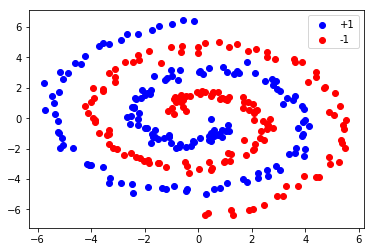

In [50]:
xTr_spiral,yTr_spiral,xTe_spiral,yTe_spiral = spiraldata()

%matplotlib inline
visualize_2D(xTr_spiral, yTr_spiral)

Since the dataset is nonlinear, we are going to use the RBF kernel.

In [51]:
beta_sol_spiral, bias_sol_spiral, final_loss_spiral = minimize(objective=loss, grad=grad, xTr=xTr_spiral, yTr=yTr_spiral, C=100, kerneltype='rbf', kpar=1)
print('The Final Loss of your model is: {:0.4f}'.format(final_loss_spiral))

K_nn = computeK('rbf', xTr_spiral, xTr_spiral, kpar=1)
reg = beta_sol_spiral @ K_nn @ beta_sol_spiral
print('The Final Squared Hinge Loss of your model is: {:0.4f}'.format(final_loss_spiral - reg))

The Final Loss of your model is: 75.1871
The Final Squared Hinge Loss of your model is: 0.8155


If you do everything correctly, your training error and test error should both be zero!

In [52]:
svmclassify_spiral = lambda x: np.sign(computeK('rbf', xTr_spiral, x, 1).transpose().dot(beta_sol_spiral) + bias_sol_spiral)

predsTr_spiral = svmclassify_spiral(xTr_spiral)
trainingerr_spiral = np.mean(predsTr_spiral != yTr_spiral)
print("Training error: %2.4f" % trainingerr_spiral)

predsTe_spiral = svmclassify_spiral(xTe_spiral)
testerr_spiral = np.mean(predsTe_spiral != yTe_spiral)
print("Test error: %2.4f" % testerr_spiral)

Training error: 0.0000
Test error: 0.0000


Now, let's visualize the classifier on the spiral dataset!

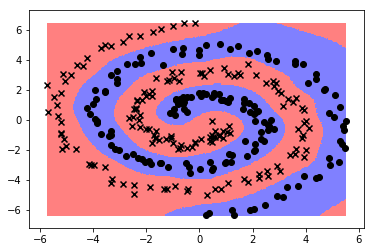

In [53]:
visclassifier(svmclassify_spiral, xTr_spiral, yTr_spiral)

<h3>Interactive Demo</h3>

Running the code below will create an interactive window where you can click to add new data points to see how a kernel SVM with RBF kernel will respond. There may be a significant delay between clicks.

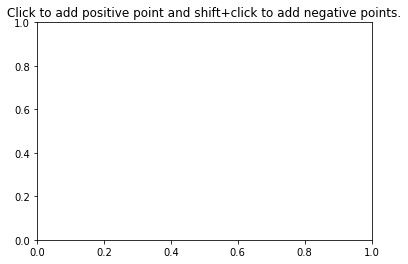

In [54]:
Xdata = []
ldata = []
svmC=10;

fig = plt.figure()
details = {
    'ax': fig.add_subplot(111), 
}

plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Click to add positive point and shift+click to add negative points.')

def vis2(fun,xTr,yTr):
    yTr = np.array(yTr).flatten()
    symbols = ["ko","kx"]
    marker_symbols = ['o', 'x']
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    classvals = np.unique(yTr)
    res=150
    xrange = np.linspace(0,1,res)
    yrange = np.linspace(0,1,res)
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T
    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T
    testpreds = fun(xTe)
    Z = testpreds.reshape(res, res)
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)

    for idx, c in enumerate(classvals):
        plt.scatter(xTr[yTr == c,0],
            xTr[yTr == c,1],
            marker=marker_symbols[idx],
            color='k'
           )
    plt.show()


def generate_onclick(Xdata, ldata):    
    global details
    def onclick(event):
        if event.key == 'shift': 
            # add positive point
            details['ax'].plot(event.xdata,event.ydata,'or')
            label = 1
        else: # add negative point
            details['ax'].plot(event.xdata,event.ydata,'ob')
            label = -1    
        pos = np.array([event.xdata, event.ydata])
        ldata.append(label)
        Xdata.append(pos)
        
        X=np.array(Xdata)
        Y=np.array(ldata)
        beta_sol, bias_sol, final_loss = minimize(objective=loss, grad=grad, xTr=X, yTr=Y, C=svmC, kerneltype='rbf', kpar=1)
        svmclassify_demo = lambda x: np.sign(computeK('rbf', X, x, 1).transpose().dot(beta_sol) + bias_sol)
        vis2(svmclassify_demo, X, Y)    
    return onclick


cid = fig.canvas.mpl_connect('button_press_event', generate_onclick(Xdata, ldata))
plt.show()

### Scikit-learn Implementation

Scikit-learn provides a variety of kernels to create [kernel SVM classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). Here's an example on the spiral dataset.

In [55]:
from sklearn.svm import SVC

clf = SVC(
    C=100,
    kernel='rbf',
    gamma=1, # equivalent to kpar in our implementation
    shrinking=False,
    tol=1e-8, # early stopping threshold, solver stops when successive losses don't change more than tol
    max_iter=10000,
    random_state=0
)
clf.fit(xTr_spiral, yTr_spiral)

predsTr_spiral = clf.predict(xTr_spiral)
trainingerr_spiral = np.mean(predsTr_spiral != yTr_spiral)
print("Training error: %2.4f" % trainingerr_spiral)

predsTe_spiral = clf.predict(xTe_spiral)
testerr_spiral = np.mean(predsTe_spiral != yTe_spiral)
print("Test error: %2.4f" % testerr_spiral)

Training error: 0.0000
Test error: 0.0000
